In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
data=pd.read_csv('/content/Shill Bidding Dataset (1).csv')

In [46]:
print(data)

      Record_ID  Auction_ID  Bidder_Tendency  Bidding_Ratio  \
0             1         732         0.200000       0.400000   
1             2         732         0.024390       0.200000   
2             3         732         0.142857       0.200000   
3             4         732         0.100000       0.200000   
4             5         900         0.051282       0.222222   
...         ...         ...              ...            ...   
6316      15129         760         0.333333       0.160000   
6317      15137        2481         0.030612       0.130435   
6318      15138        2481         0.055556       0.043478   
6319      15139        2481         0.076923       0.086957   
6320      15144        2481         0.016393       0.043478   

      Successive_Outbidding  Last_Bidding  Auction_Bids  \
0                       0.0      0.000028      0.000000   
1                       0.0      0.013123      0.000000   
2                       0.0      0.003042      0.000000   
3      

In [47]:
 data.shape

(6321, 12)

In [48]:
data.head()

,Record_ID,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,4,732,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,5,900,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


In [49]:
#check missing values in the data
data.isnull().sum()

Record_ID                 0
Auction_ID                0
Bidder_Tendency           0
Bidding_Ratio             0
Successive_Outbidding     0
Last_Bidding              0
Auction_Bids              0
Starting_Price_Average    0
Early_Bidding             0
Winning_Ratio             0
Auction_Duration          0
Class                     0
dtype: int64

In [50]:
#seperate independent and dependent variables
y=data['Class']
X=data.drop(['Class'],axis=1)

In [51]:
#importing train test split to create vadidation set 
from sklearn.model_selection import train_test_split

In [52]:
#creating the train and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 101, stratify=y, test_size=0.25) 


In [53]:
#distribution in training set
y_train.value_counts(normalize=True)

0    0.893249
1    0.106751
Name: Class, dtype: float64

In [54]:
#distribution in validation set
y_valid.value_counts(normalize=True)

0    0.893106
1    0.106894
Name: Class, dtype: float64

In [55]:
#shape of training set
X_train.shape, y_train.shape

((4740, 11), (4740,))

In [56]:
#shape of validation set
X_valid.shape, y_valid.shape

((1581, 11), (1581,))

In [57]:
#importimg decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [58]:
#importimg decision tree regressor
from sklearn.tree import DecisionTreeRegressor

In [32]:
#creating the decision tree function
dt_model = DecisionTreeClassifier(random_state=10)

In [33]:
#fitting the model
dt_model.fit(X_train , y_train)

DecisionTreeClassifier(random_state=10)

In [35]:
#checking the training score
dt_model.score(X_train, y_train)

1.0

In [36]:
#checking the validation score
dt_model.score(X_valid, y_valid)

0.9968374446552815

In [38]:
#predictions on validation set
dt_model.predict(X_valid)

array([0, 1, 1, ..., 0, 1, 0])

In [41]:
dt_model.predict_proba(X_valid)

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [63]:
y_pred = dt_model.predict_proba(X_valid) [:,1]

In [67]:
new_y = []
for i in range(len(y_pred)):
    if y_pred[i] < 0.4:
       new_y.append(0)
    else:
       new_y.append(1) 

In [69]:
from sklearn.metrics import accuracy_score

In [70]:
accuracy_score(y_valid, new_y)

0.9968374446552815

In [71]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,10):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(X_train,y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    validation_accuracy.append(dt_model.score(X_valid, y_valid))

In [72]:
frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.973207,0.971537
1,2,0.982068,0.981657
2,3,0.982278,0.982290
3,4,0.985443,0.987350
4,5,0.995781,0.997470


No handles with labels found to put in legend.


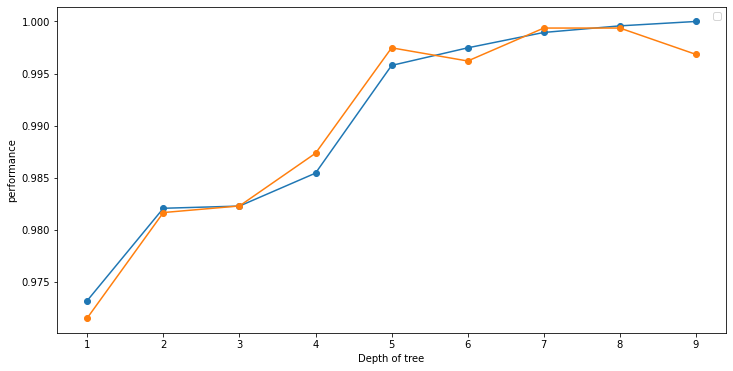

In [73]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()

In [74]:
dt_model = DecisionTreeClassifier(max_depth=8, max_leaf_nodes=25, random_state=10)

In [76]:
#fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=25, random_state=10)

In [77]:
#training score
dt_model.score(X_train, y_train)

0.9995780590717299

In [78]:
#validation score
dt_model.score(X_valid, y_valid)

1.0

In [79]:
from sklearn import tree

In [80]:
!pip install graphviz

In [81]:
decision_tree = tree.export_graphviz(dt_model,out_file='tree.dot',feature_names=X_train.columns,max_depth=2,filled=True)

In [85]:
!dot =Tpng tree.dot =o tree.png

Error: dot: can't open =Tpng
digraph Tree {
	graph [bb="0,0,765.5,348"];
	node [color=black,
		fontname=helvetica,
		label="\N",
		shape=box,
		style=filled
	];
	edge [fontname=helvetica];
	0	 [fillcolor="#e89051",
		height=0.94444,
		label="Successive_Outbidding <= 0.25\ngini = 0.191\nsamples = 4740\nvalue = [4234, 506]",
		pos="329,314",
		width=3.0972];
	1	 [fillcolor="#e58139",
		height=0.94444,
		label="Bidder_Tendency <= 0.938\ngini = 0.0\nsamples = 4109\nvalue = [4108, 1]",
		pos="229,210",
		width=2.6528];
	0 -> 1	 [head_lp="261.33,269.13",
		headlabel=True,
		labelangle=45,
		labeldistance=2.5,
		pos="e,261.82,244.13 296.26,279.95 287.54,270.88 278.02,260.98 268.96,251.56"];
	2	 [fillcolor="#6ab5eb",
		height=0.94444,
		label="Winning_Ratio <= 0.167\ngini = 0.32\nsamples = 631\nvalue = [126, 505]",
		pos="429,210",
		width=2.3889];
	0 -> 2	 [head_lp="396.67,269.13",
		headlabel=False,
		labelangle=-45,
		labeldistance=2.5,
		pos="e,396.18,244.13 361.74,279.95 370.46,270.88 379